# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [2]:
# Implementa tu respuesta en esta celda
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

archivo_2016_2 = pd.read_excel("datos/Resultados_únicos_Saber_11_2016-2.xlsx")
archivo_2016_1 = pd.read_excel("datos/Resultados_únicos_Saber_11_2016-1.xlsx")

In [3]:
print("Año evaluado: 2016 \nPeríodos: 2 y 1 \nNúmero de filas y columnas:")
print(f"Periodo 2: \nFilas: {archivo_2016_2.shape[0]} | Columnas: {archivo_2016_2.shape[1]}")
print(f"Periodo 1: \nFilas: {archivo_2016_1.shape[0]} | Columnas: {archivo_2016_1.shape[1]}")

cols = [0,3,4,5,6,13,38,50]
nuevas_cols = np.array(archivo_2016_1.columns)[cols]
print(nuevas_cols)

archivo_2016_2 = archivo_2016_2[list(nuevas_cols)]
archivo_2016_1 = archivo_2016_1[list(nuevas_cols)]

print("\nNúmero de filas y columnas (depuradas) por periodo:")
print(f"Periodo 1: Filas: {archivo_2016_1.shape[0]} | Columnas: {archivo_2016_1.shape[1]}")
print(f"Periodo 2: Filas: {archivo_2016_2.shape[0]} | Columnas: {archivo_2016_2.shape[1]}")

archivo = pd.concat([archivo_2016_1, archivo_2016_2], axis=0)

print("\nNúmero de filas y columnas resultantes de la unión de ambos conjuntos de datos:")
print(f"Calendario AB: Filas: {archivo.shape[0]} | Columnas: {archivo.shape[1]}")

print("\nNúmero de filas y columnas (depuradas) sin valores faltantes:")
print(f"Filas: {archivo.shape[0]} | Columnas: {archivo.shape[1]}")

print("\nNúmero de valores vacíos por columna:")
print(archivo.isna().sum())
total_vacios = archivo.isna().sum().sum()
total_datos_valiosos = archivo.notna().sum().sum()
print(
    f"\nNúmero total de valores vacíos: {total_vacios}"
    f"Número total de datos valiosos (no vacíos): {total_datos_valiosos}"
)
df = archivo.dropna()
print("\nDespues de eliminar valores vacíos, este es el número de filas y columnas resultantes de la depuración:")
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")


Año evaluado: 2016 
Períodos: 2 y 1 
Número de filas y columnas:
Periodo 2: 
Filas: 550275 | Columnas: 51
Periodo 1: 
Filas: 13095 | Columnas: 51
['PERIODO' 'COLE_AREA_UBICACION' 'COLE_BILINGUE' 'COLE_CALENDARIO'
 'COLE_CARACTER' 'COLE_GENERO' 'FAMI_ESTRATOVIVIENDA' 'PUNT_GLOBAL']

Número de filas y columnas (depuradas) por periodo:
Periodo 1: Filas: 13095 | Columnas: 8
Periodo 2: Filas: 550275 | Columnas: 8

Número de filas y columnas resultantes de la unión de ambos conjuntos de datos:
Calendario AB: Filas: 563370 | Columnas: 8

Número de filas y columnas (depuradas) sin valores faltantes:
Filas: 563370 | Columnas: 8

Número de valores vacíos por columna:
PERIODO                     0
COLE_AREA_UBICACION         0
COLE_BILINGUE           72802
COLE_CALENDARIO             0
COLE_CARACTER            5282
COLE_GENERO                 0
FAMI_ESTRATOVIVIENDA     2461
PUNT_GLOBAL                 0
dtype: int64

Número total de valores vacíos: 80545Número total de datos valiosos (no vacíos):

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

Comparaciones estadísticas básicas:


C:\Users\User\AppData\Local\Temp\ipykernel_1244\3958794902.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_1244\3958794902.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_1244\3958794902.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_1244\3958794902.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_1244\3958794902.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `er

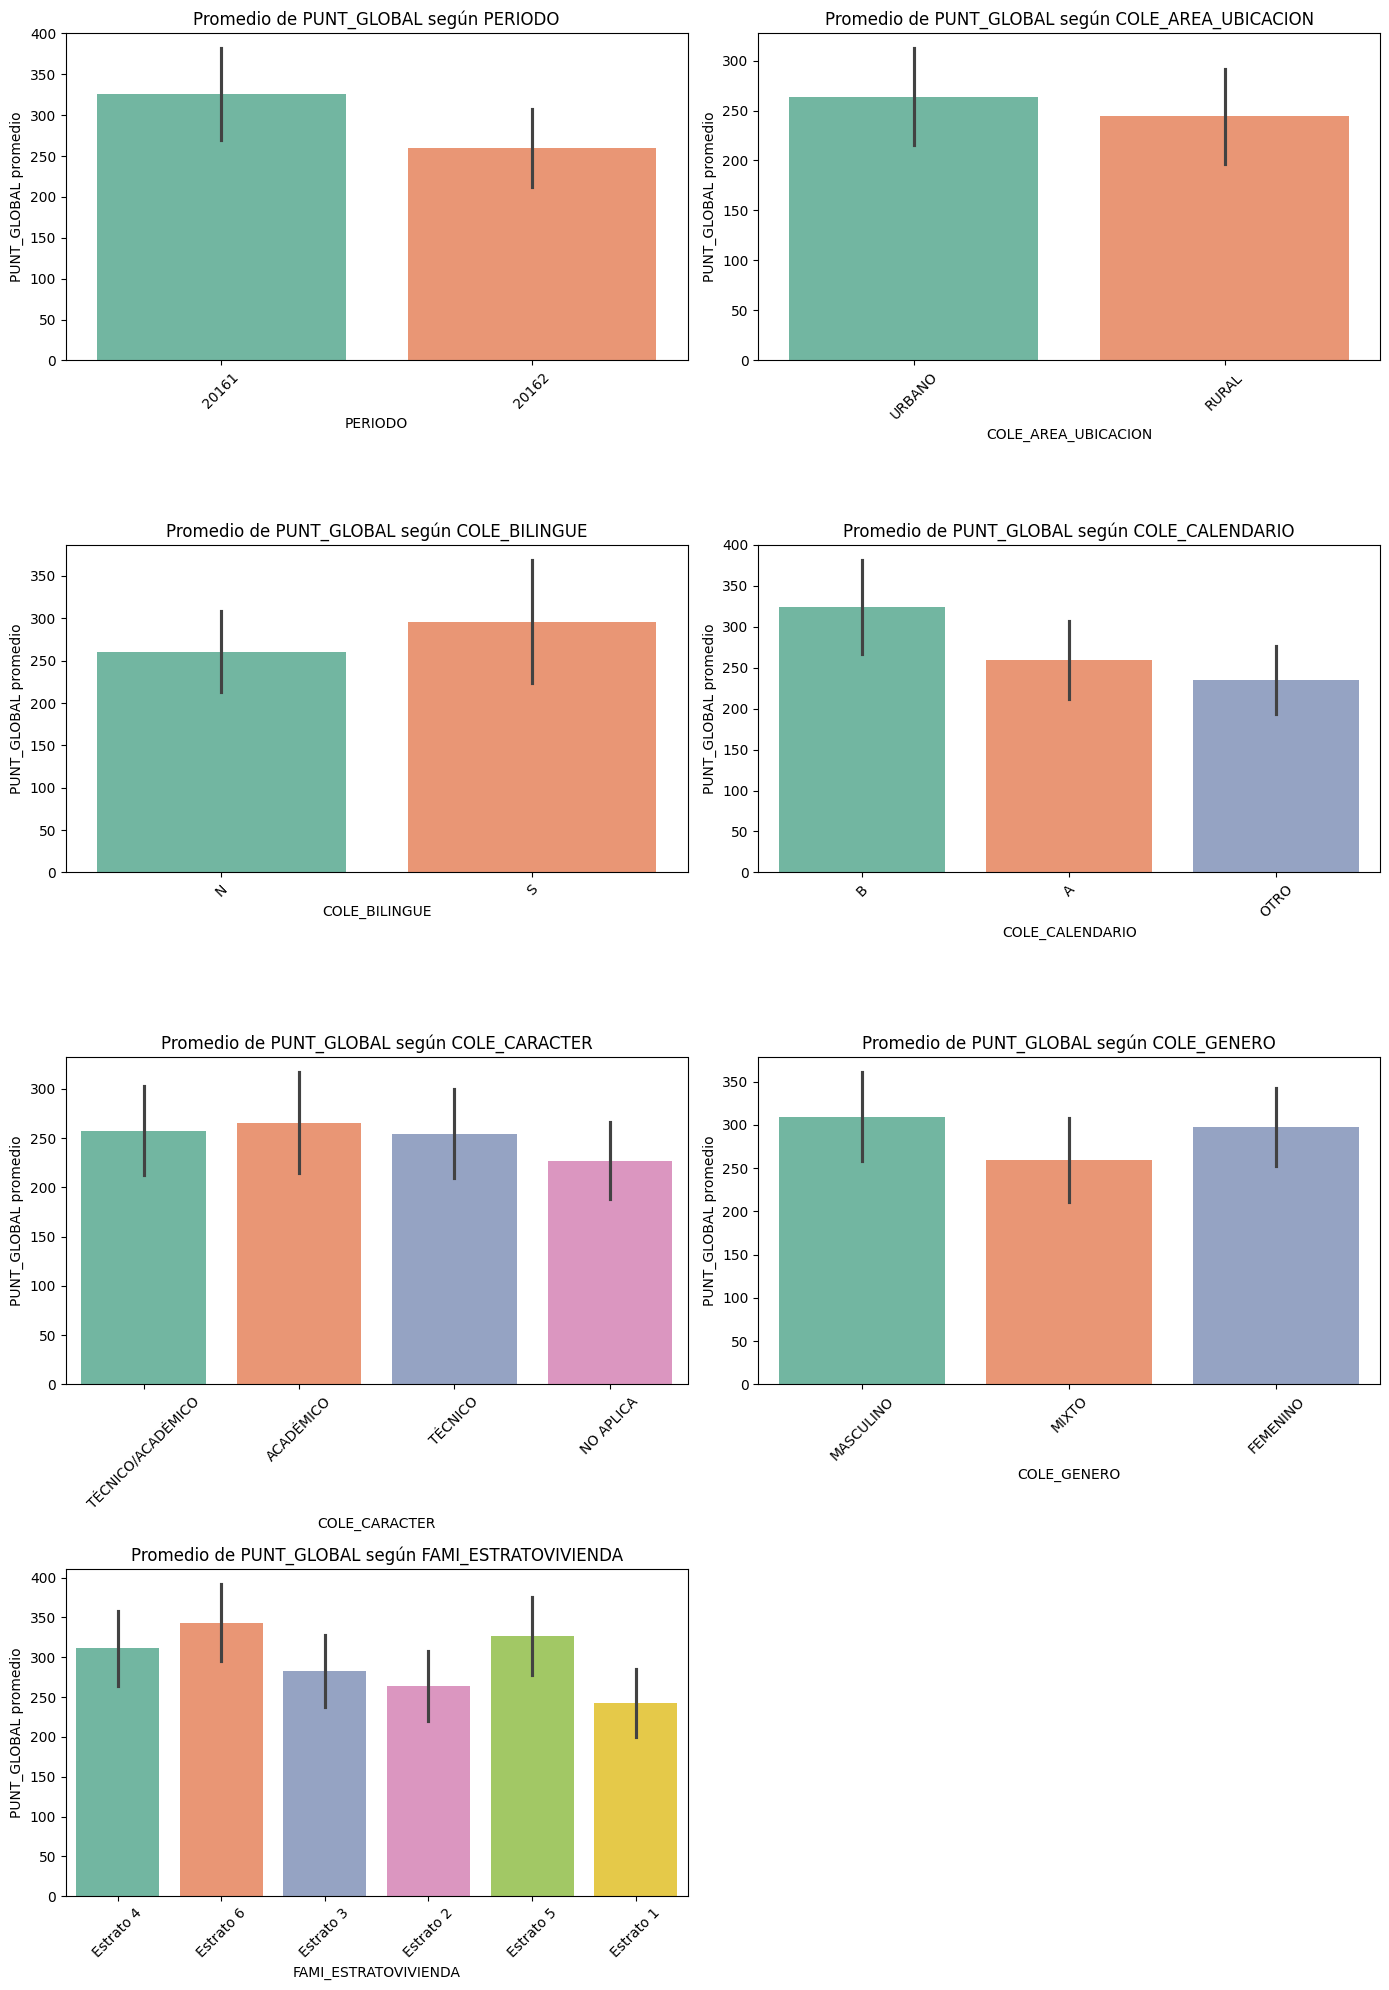


Comparaciones entre estratos en FAMI_ESTRATOVIVIENDA:

Comparación entre Estrato 4 y Estrato 6:
  - T-test: t=-38.76, p=0.0000
  - Mann-Whitney U: u=24047625.50, p=0.0000
  - Si p < 0.05, hay diferencia estadísticamente significativa

Comparación entre Estrato 4 y Estrato 3:
  - T-test: t=75.80, p=0.0000
  - Mann-Whitney U: u=969028567.00, p=0.0000
  - Si p < 0.05, hay diferencia estadísticamente significativa

Comparación entre Estrato 4 y Estrato 2:
  - T-test: t=128.11, p=0.0000
  - Mann-Whitney U: u=2262505307.50, p=0.0000
  - Si p < 0.05, hay diferencia estadísticamente significativa

Comparación entre Estrato 4 y Estrato 5:
  - T-test: t=-21.65, p=0.0000
  - Mann-Whitney U: u=52108247.50, p=0.0000
  - Si p < 0.05, hay diferencia estadísticamente significativa

Comparación entre Estrato 4 y Estrato 1:
  - T-test: t=188.85, p=0.0000
  - Mann-Whitney U: u=3264004840.50, p=0.0000
  - Si p < 0.05, hay diferencia estadísticamente significativa

Comparación entre Estrato 6 y Estrato 3:

In [6]:
# Implementa tu respuesta en esta celda
import seaborn as sns
from scipy import stats
import math
print("Comparaciones estadísticas básicas:")

categ_cols = [c for c in df.columns if c != 'PUNT_GLOBAL']

n = len(categ_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(categ_cols):
    sns.barplot(
        x=col,
        y='PUNT_GLOBAL',
        data=df,
        ci='sd',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Promedio de PUNT_GLOBAL según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('PUNT_GLOBAL promedio')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("\nComparaciones entre estratos en FAMI_ESTRATOVIVIENDA:")

estratos = df['FAMI_ESTRATOVIVIENDA'].unique()

for i in range(len(estratos)):
    for j in range(i+1, len(estratos)):
        group1 = df[df['FAMI_ESTRATOVIVIENDA'] == estratos[i]]['PUNT_GLOBAL']
        group2 = df[df['FAMI_ESTRATOVIVIENDA'] == estratos[j]]['PUNT_GLOBAL']
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
        u_stat, p_val_u = stats.mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"\nComparación entre {estratos[i]} y {estratos[j]}:")
        print(f"  - T-test: t={t_stat:.2f}, p={p_val:.4f}")
        print(f"  - Mann-Whitney U: u={u_stat:.2f}, p={p_val_u:.4f}")
        print("  - Si p < 0.05, hay diferencia estadísticamente significativa")


## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [7]:
# Implementa tu respuesta en esta celda
y = df['PUNT_GLOBAL'].astype(float) 
X = df.drop(columns=['PUNT_GLOBAL'])
X = pd.get_dummies(X, drop_first=True)

In [8]:
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

Dimensiones de X: (487639, 15)
Dimensiones de y: (487639,)


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [10]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("=== Desempeño del modelo ===")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

=== Desempeño del modelo ===
RMSE: 43.19
R²: 0.212


In [11]:
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 variables más importantes:")
print(importances.head(10))


Top 10 variables más importantes:
PERIODO                            0.203209
FAMI_ESTRATOVIVIENDA_Estrato 4     0.182286
FAMI_ESTRATOVIVIENDA_Estrato 3     0.180853
FAMI_ESTRATOVIVIENDA_Estrato 2     0.139833
FAMI_ESTRATOVIVIENDA_Estrato 5     0.105520
FAMI_ESTRATOVIVIENDA_Estrato 6     0.052772
COLE_GENERO_MIXTO                  0.034259
COLE_BILINGUE_S                    0.030886
COLE_AREA_UBICACION_URBANO         0.027533
COLE_CARACTER_TÉCNICO/ACADÉMICO    0.013459
dtype: float64


## Fase 4

Deberás elegir y realizar una de las dos alternativas que se encuentran a continuación.

### Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


### Alternativa 2: registrar en bases de datos relacionales con PySpark

En esta fase desarrollarás, a partir de alguno de los análisis realizados, un _script_ que sea relevante en el contexto del problema, acompañado de las instrucciones necesarias para que un usuario lo pueda ejecutar.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu anális, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puedes ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en un única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

Preguntas guía:

* ¿Cómo aporta la segmentación de los datos en categorías de campos al manejo de los datos?
* ¿Qué filtros y agrupaciones podemos aplicar sobre los datos con el fin de obtener información relevante?

In [ ]:
# Implementa tu respuesta en esta celda


## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022